## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [1]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv'

In [2]:
import pandas as pd

survey = pd.read_csv(url)

In [3]:
survey.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [24]:
survey.shape

(2761, 15)

In [5]:
twenty = survey.sample(n=20)

In [7]:
hundred = survey.sample(n=200)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [9]:
mean_t = twenty['ConvertedSalary'].mean()
mean_h = hundred['ConvertedSalary'].mean()

print(mean_t)
print(mean_h)

66219.25
71413.93


**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I would trust the two hundred sample mean more because it represents a larger portion of the population, granting it a closer shape to the normal distribution. A non-technical side would likely not be capable of making that inference, therefor having no idea which mean to trust more.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

Yes, seeing such a drastic change between the twenty and two-hundred samples showcases that the samples themselves could not be a good representation of the population mean.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



Place some text explaining the context and the significance of the drastic change between the two samples, as well as some visual information for them to asily consume.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [10]:
sd_t = twenty['ConvertedSalary'].std()
sd_h = hundred['ConvertedSalary'].std()

In [11]:
n_t = twenty['ConvertedSalary'].count()
n_h = hundred['ConvertedSalary'].count()

In [12]:
se_t = sd_t/(n_t ** 0.5)
se_h = sd_h/(n_h ** 0.5)

In [14]:
from scipy.stats import t

In [15]:
interval_t = t.interval(alpha= 0.95, df=19, loc = mean_t, scale = se_t)
interval_t

(45289.17819241008, 87149.32180758992)

In [16]:
interval_h = t.interval(alpha= 0.95, df=19, loc = mean_h, scale = se_h)
interval_h

(63601.46540856483, 79226.39459143516)

In [31]:
twenty

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
423,12573,No,Employed full-time,"Computer science, computer engineering, or sof...",Front-end developer;Full-stack developer,9-11 years,6-8 years,24172.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;C++;Java;JavaScript;HTML;CSS;Bash/Shell,Male,25 - 34 years old,Hispanic or Latino/Latina
461,13682,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Data or business analyst;Da...,21-23 years,21-23 years,160000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;C#;Java;JavaScript;Objective-C;PHP;Python;R;...,Male,55 - 64 years old,White or of European descent
530,15688,No,Employed full-time,"Computer science, computer engineering, or sof...",DevOps specialist;Full-stack developer,3-5 years,3-5 years,112730.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,Go;Java;JavaScript;Perl;Python;SQL;TypeScript;...,Male,35 - 44 years old,East Asian
1578,47103,No,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,12-14 years,9-11 years,32088.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Less than a month,Java;JavaScript;SQL,Male,35 - 44 years old,Middle Eastern
2528,75271,No,"Independent contractor, freelancer, or self-em...","Another engineering discipline (ex. civil, ele...",Front-end developer;Full-stack developer;Mobil...,21-23 years,21-23 years,97308.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,One to three months,CoffeeScript;Groovy;JavaScript;HTML;CSS;Bash/S...,Male,45 - 54 years old,White or of European descent
232,7429,"Yes, part-time",Employed part-time,"Information systems, information technology, o...",Back-end developer;Data or business analyst;Da...,12-14 years,9-11 years,14172.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,JavaScript;PHP;SQL;HTML;CSS,Male,25 - 34 years old,South Asian
889,26204,No,Employed full-time,"A health science (ex. nursing, pharmacy, radio...",Back-end developer;Designer;DevOps specialist;...,6-8 years,6-8 years,75000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;CoffeeScript;F#;JavaScript;SQL;TypeScript;V...,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
1227,35802,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;De...,24-26 years,18-20 years,117492.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Less than a month,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,Male,35 - 44 years old,White or of European descent
1569,46836,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,3-5 years,49697.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Less than a month,C#;Haskell;JavaScript;Ruby;SQL;TypeScript;HTML...,Male,18 - 24 years old,White or of European descent
1164,33937,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;Front-end developer;Full-st...,6-8 years,3-5 years,41204.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already ha

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [17]:
print(mean_t)
print(mean_h)

66219.25
71413.93


In [18]:
print(se_t)
print(se_h)

9999.919381484244
3732.620547279804


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

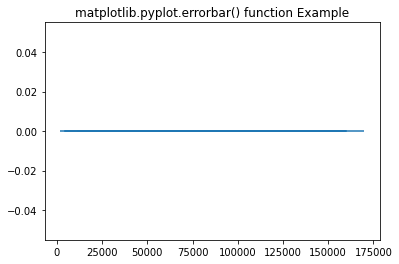

In [56]:
# Graph is incorrect at the current moment

import matplotlib.pyplot as plt
import numpy as np

# example data 
xval = twenty['ConvertedSalary']
yval = np.exp(-xval)
  
plt.errorbar(xval, yval, xerr = se_t, yerr = 0)
  
plt.title('matplotlib.pyplot.errorbar() function Example') 
plt.show() 


**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [27]:
se_all = survey['ConvertedSalary'].std()/(survey['ConvertedSalary'].count() ** 0.5)

In [28]:
interval_all = t.interval(alpha= 0.95, df=2760, loc = survey['ConvertedSalary'].mean(), scale = se_h)

In [29]:
interval_all

(66134.39272063263, 80772.41568211999)

In [ ]:
# Much better precision, range of means has been reduced greatly.

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.